# Exploration 3. 프로젝트: 고양이 수염 스티커 만들기 
---
## Step 구성
1. 스티커 구하기 or 만들기 
2. 얼굴 검출 & 랜드마크 검출 하기
3. 스티커 적용 위치 확인하기 
4. 스티커 적용하기 
5. 문제점 찾아보기
---

## Step. 0 모듈 Import

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

---

## Step.1 스티커 구하기 or 만들기 

스티커는 고양이 수염 이미지(cat-whiskers.png)를 사용하였다. 또한 4장의 face이미지(face1.jpeg,face2.jpeg,face3.jpeg,face4.jpeg)를 사용하여 그 위에 고양이 스티커를 붙여 볼 생각이다.

### 스티커 확인 

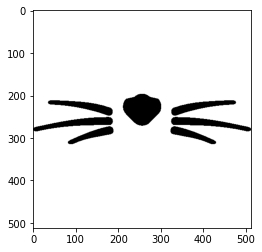

(512, 512, 3)


In [2]:
my_sticker_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/cat-whiskers.png'
sticker = cv2.imread(my_sticker_path)     
plt.imshow(sticker)
plt.show()

print(sticker.shape)

### 이미지 확인 

이미지 업로딩을 함수화 & 원본 이미지와 copy 이미지 반환

In [3]:
images = ["face1.jpeg", "face2.jpeg", "face3.jpeg", "face4.jpeg"]

def img_load(img):
    my_image_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/{img}'
    img_origin = cv2.imread(my_image_path) # original image
    img_copy = img_origin.copy() # copy image
    img_rgb = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb)
    plt.show()
    
    print(img_rgb.shape)
    return img_origin, img_copy


원본 이미지와 copy 이미지를 img_origin_copy 배열에 저장 & 업로드 이미지 확인 및 저장된 원본 이미지, copy 이미지 확인       
img_origin_copy -> [0]채널에 origin이미지 저장, [1]채널에 copy이미지 저장

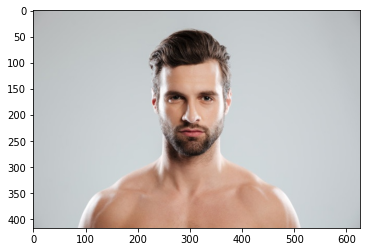

(417, 626, 3)


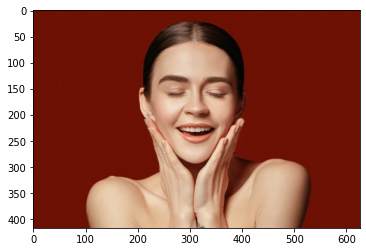

(417, 626, 3)


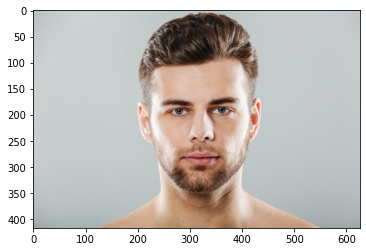

(417, 626, 3)


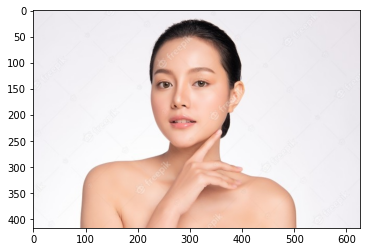

(417, 626, 3)

 원본 이미지 출력


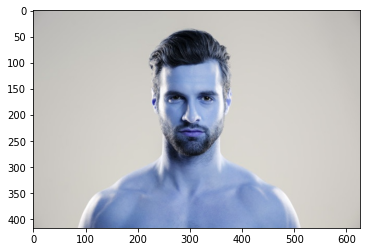

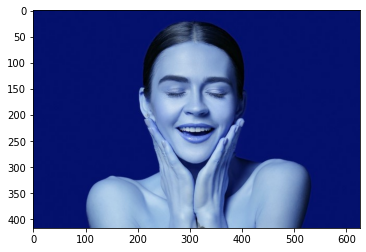

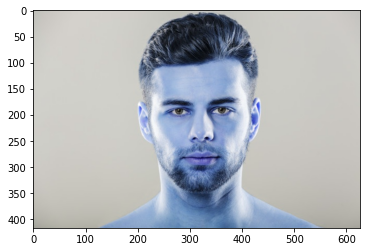

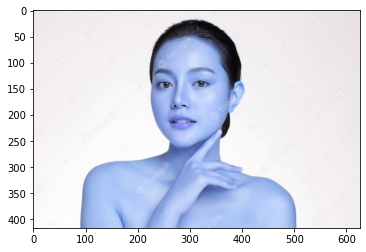


 copy 이미지 출력


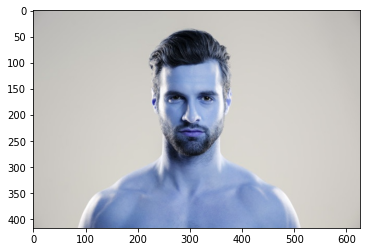

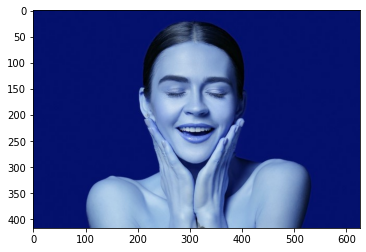

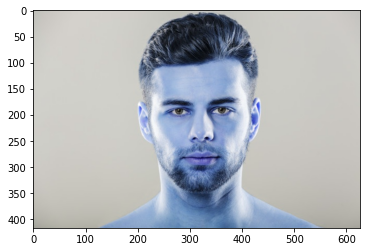

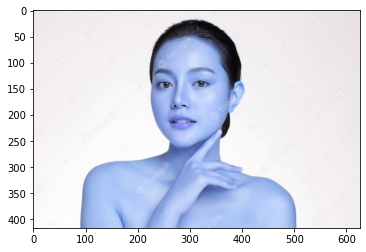

In [4]:
img_origin_copy = [] # 원본 이미지 & copy 이미지

for img in images:
    img_origin_copy.append(img_load(img))

print("\n 원본 이미지 출력")
for img in img_origin_copy:
    plt.imshow(img[0])
    plt.show()

print("\n copy 이미지 출력")
for img in img_origin_copy:
    plt.imshow(img[1])
    plt.show()

---

## Step 2. 얼굴영역 검출 & landmark 검출

### 얼굴영역 검출

face detection 함수화      
dlib의 face detector를 호출하고 face detector를 이용해 box의 모서리를 구함     
그 후 copy이미지의 box 그리기     
함수에서 각 이미지마다 모서리를 반환

In [5]:
def face_detection(img_copy):
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)  
    
    # detector를 선언합니다
    detector_hog = dlib.get_frontal_face_detector()
    
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

    for dlib_rect in dlib_rects: # box의 모서리 구하기
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_copy, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # box 그리기
    
    img_show_rgb =  cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    
    print(dlib_rects)
    
    return dlib_rects
    

각각의 이미지를 face_detection함수에 넣기   
그 후 반환된 각 이미지의 모서리 저장 및 확인

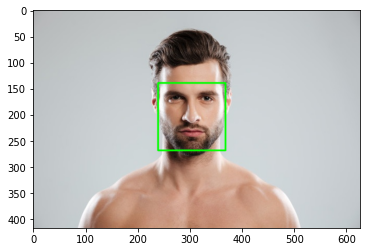

rectangles[[(239, 139) (368, 268)]]


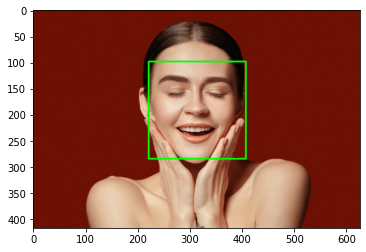

rectangles[[(221, 98) (407, 284)]]


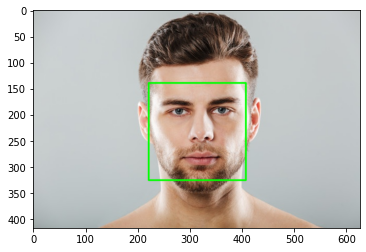

rectangles[[(221, 139) (407, 325)]]


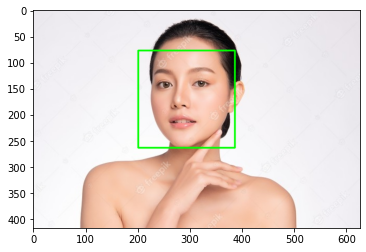

rectangles[[(201, 77) (386, 263)]]
239 139 368 268
221 98 407 284
221 139 407 325
201 77 386 263


In [6]:
dlib_rects_all = []

for _, img_copy in img_origin_copy:
    dlib_rects_all.append(face_detection(img_copy)) 
    
for dlib_rects in dlib_rects_all: # 모서리 확인 
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        print(l,t,r,b)

### landmark 검출

dlib의 landmark predictor 호출

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

얼굴영역에 face landmark 좌표 검출 및 선언     
각각의 이미지마다 landmark 좌표 리스트 반환

In [8]:
def face_landmark_localization(img_copy, dlib_rects, landmark_predictor):
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) 
    
    list_landmarks = [] # landmark를 담을 배열 선언

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    print(len(list_landmarks[0])) # landmark의 개수 print
    
    for landmark in list_landmarks: # landmark위치의 점 찍기
        for point in landmark:
            cv2.circle(img_copy, point, 2, (0, 255, 255), -1)
    
    img_show_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    
    return list_landmarks

함수 실행 및 반환된 landmark 좌표 저장

68


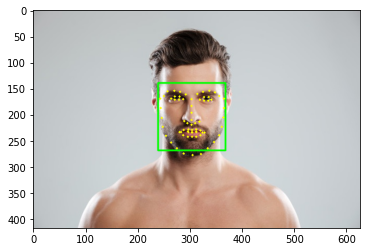

68


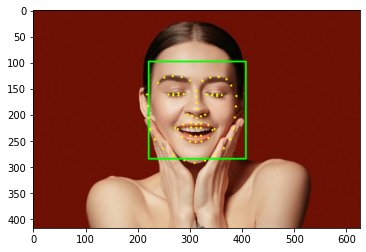

68


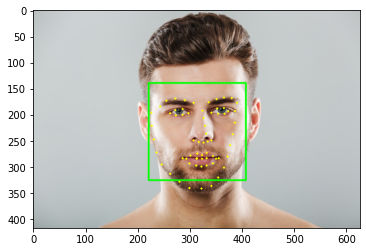

68


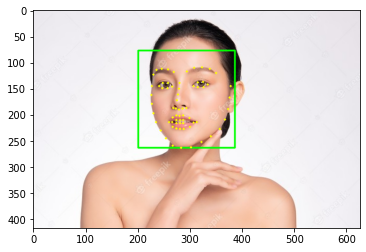

In [9]:
list_landmarks_all = []

for i, (_, img_copy) in enumerate(img_origin_copy):
    list_landmarks_all.append(face_landmark_localization(img_copy, dlib_rects_all[i],landmark_predictor))

---

## 3. 스티커 적용 위치 확인

landmark의 index를 확인하여 스티커를 적용할 위치 확인

스티커 적용 위치는 index[30] 적용

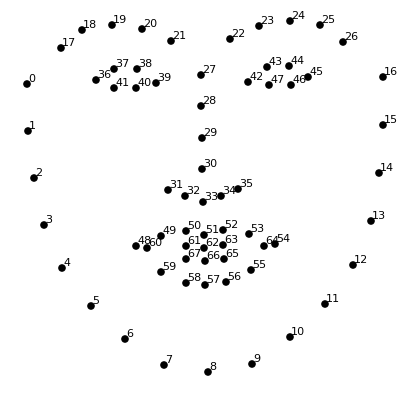

---

## 4. 스티커 적용 하기

sticker 적용 함수화 

In [10]:
def sticker(img_origin, dlib_rects, list_landmarks):
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):    
        
        x = landmark[30][0] # 스티커의 x좌표
        y = landmark[30][1] # 스티머의 y좌표
        
        w = h = dlib_rect.width()
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 resize

    refined_x = x - w // 2 # top
    refined_y = y - h // 2 # left
    
    # 이미지가 박스를 넘어갔을 경우 예외처리
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    
    # 출력을 copy가 아닌 original 이미지로 하여 box와 landmark 제거
    sticker_area = img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    
    img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
    plt.show()

스티커를 적용한 최종 이미지 출력

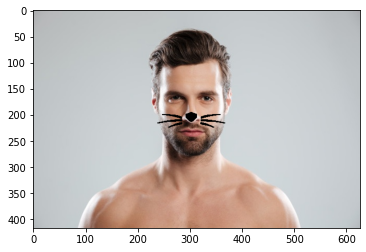

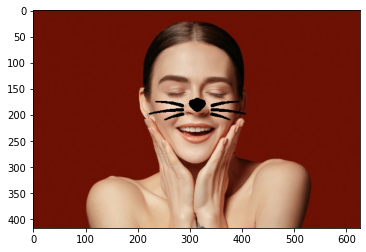

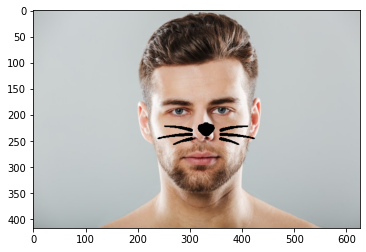

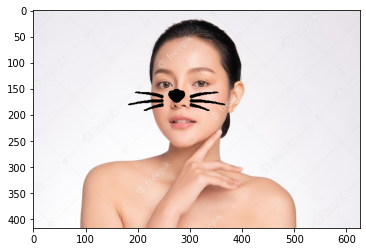

In [11]:
for i, (img_origin, _) in enumerate(img_origin_copy):
    sticker(img_origin, dlib_rects_all[i], list_landmarks_all[i])

---

## 5. 문제점 찾아보기

지금까지는 일반적인 얼굴(얼굴의 크기, 각도, 이미지의 명암 등..)의 이미지들을 가지고 수행하였다.     
하지만 다른 경우에도 지금 구현한 알고리즘이 적용 될 수있을까?    
다음의 경우들을 살펴보자!      

1. 검출된 얼굴의 크기가 작은 경우
2. 검출된 얼굴의 각도가 뒤틀린 경우
3. 이미지의 명암이 어두운 경우 
4. 여러 사람이 존재하는 이미지인 경우

---

## 1. 검출된 얼굴의 크기가 작은 경우

### 이미지확인

이미지는 face1.jpeg를 가공해서 만들었다.

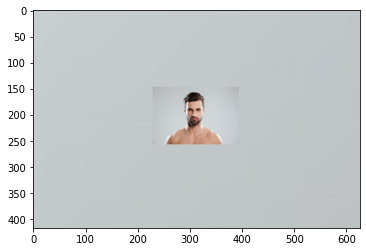

In [12]:
img_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/small_face.jpeg'
small_face = cv2.imread(img_path) # original image
sm_face_cp = small_face.copy()

plt.imshow(cv2.cvtColor(sm_face_cp, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 검출

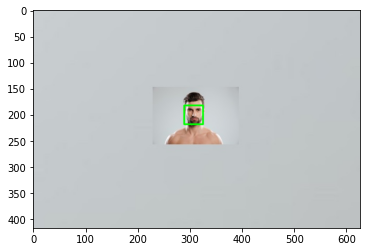

rectangles[[(289, 182) (325, 218)]]


In [13]:
rect_sm = face_detection(sm_face_cp)

### Landmark 검출

68


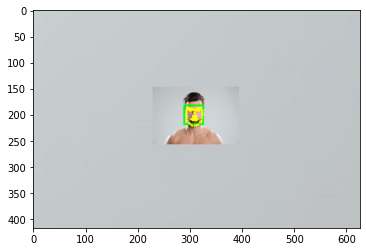

In [14]:
landmark_sm = face_landmark_localization(sm_face_cp, rect_sm, landmark_predictor)

### 스티커 적용

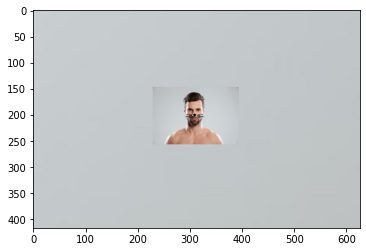

In [15]:
sticker(small_face, rect_sm, landmark_sm)

자세히 보면 아주 작은 얼굴에도 고양이 수염 스티커가 잘 적용된것을 확인 할 수 있다.

## 2. 검출된 얼굴의 각도가 뒤틀린 경우

### 이미지 확인 

이미지는 face1.jpeg를 왼쪽으로 90도, 오른쪽으로 90도 회전한 이미지이다.

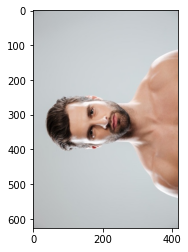

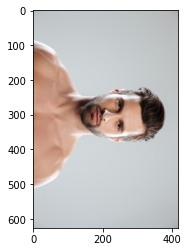

In [16]:
img_path1 = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/face_left.jpeg'
img_path2 = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/face_right.jpeg'

left_face = cv2.imread(img_path1) # original image
right_face = cv2.imread(img_path2) # original image

l_face_cp = left_face.copy()
r_face_cp = right_face.copy()

plt.imshow(cv2.cvtColor(l_face_cp, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(r_face_cp, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 검출 

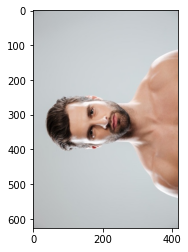

rectangles[]


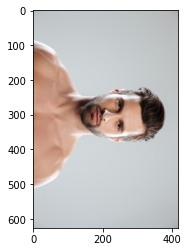

rectangles[]


In [17]:
rect_l = face_detection(l_face_cp)
rect_r = face_detection(r_face_cp)

dlib의 dlib.get_frontal_face_detecto말고 opencv나 다른 패키지들의 라이브러리를 사용해 봤지만 90도의 회전이 된 이미지의 얼굴 검출은 할 수 없었다.. 하지만 45도 정도 뒤틀린 이미지는 얼굴 인식이 가능했다.

### 이미지 확인

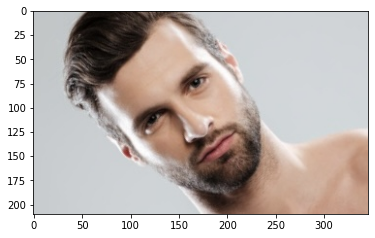

In [18]:
img_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/face_45.jpg'

face_45 = cv2.imread(img_path) # original image

face_45_cp = face_45.copy()

plt.imshow(cv2.cvtColor(face_45_cp, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 검출

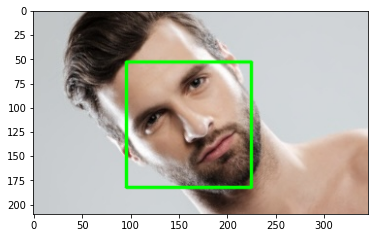

rectangles[[(96, 53) (225, 182)]]


In [19]:
rect_45 = face_detection(face_45_cp)

### landmark 검출

68


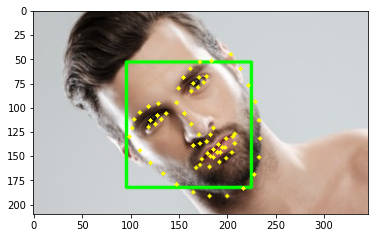

In [20]:
landmark_45 = face_landmark_localization(face_45_cp, rect_45, landmark_predictor)

### 스티커 적용

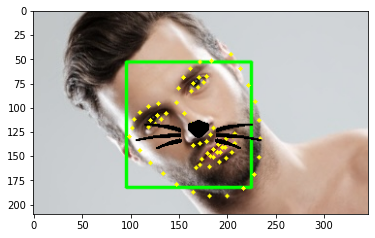

In [21]:
sticker(face_45_cp, rect_45, landmark_45)

45도 rotate된 경우 스티커도 각도에 맞춰 rotate할 필요가 있음    
sticker()함수 수정

In [22]:
import math

def sticker_new(img_origin, dlib_rects, list_landmarks):
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):    
        
        x = landmark[30][0] # 스티커의 x좌표
        y = landmark[30][1] # 스티머의 y좌표
        
        w = h = dlib_rect.width()
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 resize

    refined_x = x - w // 2 # top
    refined_y = y - h // 2 # left
    
    # 이미지가 박스를 넘어갔을 경우 예외처리
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    
    # 출력을 copy가 아닌 original 이미지로 하여 box와 landmark 제거
    sticker_area = img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    
    # math패키지를 활용하여 각도 구하기
    height, width, channel = img_sticker.shape
    ang = math.atan(h/w)/math.pi*180

    matrix = cv2.getRotationMatrix2D((width/2, height/2), ang, 1)
    img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))
    
    img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
    plt.show()

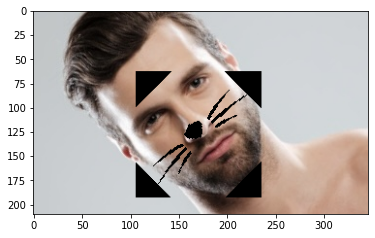

In [23]:
sticker_new(face_45, rect_45, landmark_45)

회전된 이미지에 따라 스티커의 각도를 변경하였지만 스티커를 회전할 때 생긴 검은색 부분은 제거하지 못하였다.

## 3. 이미지의 명암이 어두운 경우

### 이미지 확인 

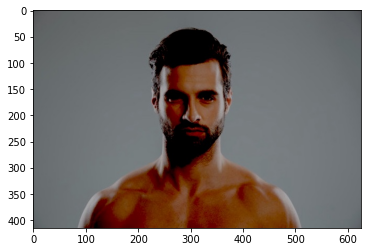

In [24]:
img_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/face_dark.jpeg'

face_dark = cv2.imread(img_path) # original image

face_dark_cp = face_dark.copy()

plt.imshow(cv2.cvtColor(face_dark_cp, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 검출

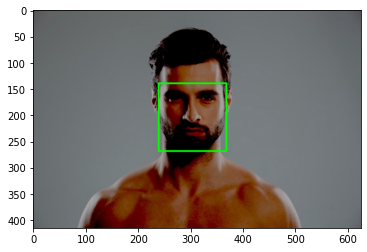

rectangles[[(239, 139) (368, 268)]]


In [25]:
rect_dark = face_detection(face_dark_cp)

### landmark 검출

68


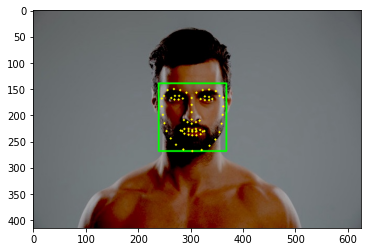

In [26]:
landmark_dark = face_landmark_localization(face_dark_cp, rect_dark, landmark_predictor)

### 스티커 적용

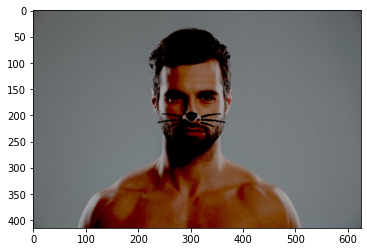

In [27]:
sticker(face_dark, rect_dark, landmark_dark)

어두운 이미지에서는 잘 적용되는 것을 확인 할 수 있다.

## 4. 여러 사람이 존재하는 이미지인 경우

### 이미지 확인

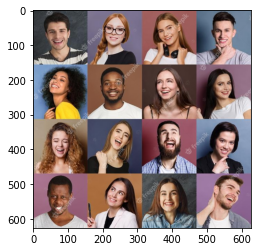

In [28]:
img_path = os.getenv('HOME')+ f'/aiffel/camera_sticker/images/face_people.jpeg'

face_people = cv2.imread(img_path) # original image

face_people_cp = face_people.copy()

plt.imshow(cv2.cvtColor(face_people_cp, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 검출

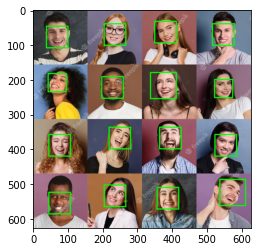

rectangles[[(218, 336) (280, 398)], [(337, 179) (411, 254)], [(38, 46) (100, 108)], [(204, 502) (266, 564)], [(45, 357) (107, 419)], [(515, 39) (577, 101)], [(349, 32) (411, 94)], [(356, 509) (418, 571)], [(204, 39) (266, 101)], [(363, 336) (425, 398)], [(521, 199) (573, 251)], [(197, 191) (259, 253)], [(522, 357) (584, 419)], [(536, 486) (610, 561)], [(43, 182) (95, 234)], [(45, 523) (107, 585)]]
16


In [29]:
rect_people = face_detection(face_people_cp)
print(len(rect_people))

### landmark 검출

68


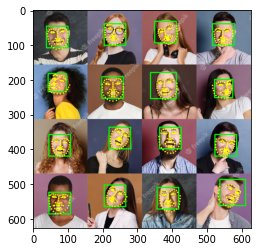

253


In [30]:
landmark_people = face_landmark_localization(face_people_cp, rect_people, landmark_predictor)
print(landmark_people[0][30][0])

### 스티커 적용

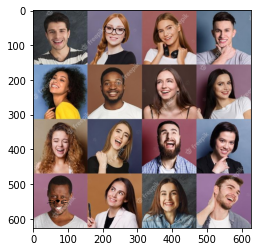

In [31]:
sticker(face_people, rect_people, landmark_people)

얼굴인식과 landmark검출은 여러명의 사람에게 적용 됬지만 스티커는 한 사람에게만 적용되었다.(sticker()함수 수정 필요!)

In [32]:
def sticker_people(img_origin, dlib_rects, list_landmarks):
     
    x = []
    y = []
    w_h = []
    
    for i ,(dlib_rect, landmark) in enumerate(zip(dlib_rects, list_landmarks)): 
        x.append(landmark[30][0]) # 스티커의 x좌표
        y.append(landmark[30][1]) # 스티머의 y좌표

        w_h.append(dlib_rect.width())

    for i, _ in enumerate(dlib_rects):
        sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
        img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
        img_sticker = cv2.resize(img_sticker, (w_h[i], w_h[i])) # 스티커 resize

        refined_x = x[i] - w_h[0] // 2 # top
        refined_y = y[i] - w_h[1] // 2 # left
    
        # 이미지가 박스를 넘어갔을 경우 예외처리
        if refined_x < 0: 
            img_sticker = img_sticker[:, -refined_x:]
            refined_x = 0
        if refined_y < 0:
            img_sticker = img_sticker[-refined_y:, :]
            refined_y = 0
    
        # 출력을 copy가 아닌 original 이미지로 하여 box와 landmark 제거
        sticker_area = img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

        img_origin[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
    plt.show()

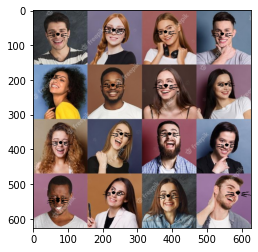

In [33]:
sticker_people(face_people, rect_people, landmark_people)

결과를 보면 모든 얼굴에 고양이 수염 스티커가 적용된 것을 볼 수 있다.

---

# 프로젝트 정리

## 결과분석

검출된 얼굴의 크기가 작은 경우
-> 검출된 얼굴이 아주 작은 경우를 제외하고 일반적으로 조금 작을 경우 스티커 적용이 가능하였다.

검출된 얼굴의 각도가 뒤틀린 경우
-> 각도가 90도로 rotate된 이미지는 얼굴인식이 되지 않았지만 45도정도 rotate된 이미지는 스티커 적용이 가능하였다.

이미지의 명암이 어두운 경우
-> 어느 정도 어두운 이미지에서도 스티커 적용이 가능하였다.

여러 사람이 존재하는 이미지인 경우
-> sticker()함수만 수정하면 한 장의 이미지속 여러 얼굴에 대해서도 스티커 적용이 가능하였다.

어려웠던 점
- 이미지의 original과 copy의 개념을 잘 몰라 마지막에 box와 landmark를 지우는데 힘들었다.
- 문제점 분석 중 각도에 대한 문제점에서 90도 rotate된 이미지의 얼굴인식이 되게금 하려다가 3시간정도를 쓴것 같다. 하지만 결론적으로 구현하지 못했다.